# 🧠 NeuroTradeX: Feature Engineering
This notebook creates trading-relevant features based on raw stock data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=['Date'])
df.sort_values(by=['SecuritiesCode', 'Date'], inplace=True)
df.reset_index(drop=True, inplace=True)


## 🎯 Create Core Features

In [2]:
# Daily return
# df['Return'] = df.groupby('SecuritiesCode')['Close'].pct_change()
# Daily return without implicit forward fill
df['Return'] = df.groupby('SecuritiesCode')['Close'].pct_change(fill_method=None)


# 10-day rolling volatility
df['Volatility_10'] = df.groupby('SecuritiesCode')['Return'].rolling(window=10).std().reset_index(level=0, drop=True)

# 10-day and 30-day moving averages
df['MA_10'] = df.groupby('SecuritiesCode')['Close'].transform(lambda x: x.rolling(window=10).mean())
df['MA_30'] = df.groupby('SecuritiesCode')['Close'].transform(lambda x: x.rolling(window=30).mean())

# Volume change (day-over-day)
df['Volume_Change'] = df.groupby('SecuritiesCode')['Volume'].pct_change()


## ⚠️ Flag Features

In [3]:
# Bullish crossover flag
df['Crossover_Bullish'] = (df['MA_10'] > df['MA_30']).astype(int)

# Volume spike flag: today's volume > 2x 10-day average
df['Volume_Avg_10'] = df.groupby('SecuritiesCode')['Volume'].transform(lambda x: x.rolling(window=10).mean())
df['Vol_Surge_Flag'] = (df['Volume'] > 2 * df['Volume_Avg_10']).astype(int)


## 🔍 Sample Output

In [4]:
# View sample data with features
df[['Date', 'SecuritiesCode', 'Close', 'Return', 'Volatility_10', 'MA_10', 'MA_30', 'Crossover_Bullish', 'Vol_Surge_Flag']].tail(10)


,Date,SecuritiesCode,Close,Return,Volatility_10,MA_10,MA_30,Crossover_Bullish,Vol_Surge_Flag
2332521,2021-11-19,9997,716.0,0.000000,0.010893,744.7,787.800000,0,0
2332522,2021-11-22,9997,712.0,-0.005587,0.010850,739.2,784.066667,0,0
2332523,2021-11-24,9997,703.0,-0.012640,0.010940,733.2,779.300000,0,0
2332524,2021-11-25,9997,706.0,0.004267,0.011130,727.3,775.066667,0,0
2332525,2021-11-26,9997,688.0,-0.025496,0.012175,720.9,770.266667,0,0
2332526,2021-11-29,9997,668.0,-0.029070,0.012597,712.1,764.766667,0,0
2332527,2021-11-30,9997,667.0,-0.001497,0.013048,704.1,759.233333,0,0
2332528,2021-12-01,9997,685.0,0.026987,0.017161,699.5,754.266667,0,0
2332529,2021-12-02,9997,684.0,-0.001460,0.016872,694.5,749.433333,0,0
2332530,2021-12-03,9997,696.0,0.017544,0.017231,692.5,745.333333,0,0


## 📊 Feature Distribution Examples

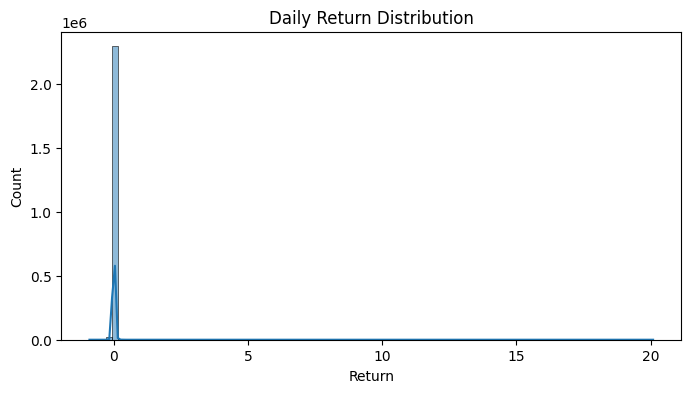

In [5]:
# Distribution of Return
plt.figure(figsize=(8,4))
sns.histplot(df['Return'].dropna(), bins=100, kde=True)
plt.title('Daily Return Distribution')
plt.show()
